# Import Libraries

Here we import all the libraries needed for loading, processing, and visualizing the dataset

In [1]:
# Import the needed libraries
import kagglehub
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# Needed for some non-Seaborn-based enhancements
from scipy.stats import gaussian_kde
# Principal Component Analysis
from sklearn.decomposition import PCA

# About the Dataset
---

This dataset consists of data collected as part of a research project involving 30 volunteers. These volunteers wore a mobile phone and performed some specific actions. The data from the mobile phone was collected and used to analyze rotation, velocity, and other interesting calculations.

The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) at the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50 Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers were selected for generating the training data and 30% for the test data. 

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low-frequency components; therefore, a filter with a 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domains.

These details are specified in the 'features_info.txt' file, which describes the labels in the 'features.txt'. 

*Interesting Calculations*:

Subsequently, the body linear acceleration and angular velocity were derived in time to obtain Jerk signals (tBodyAccJerk-XYZ and tBodyGyroJerk-XYZ). Also, the magnitude of these three-dimensional signals was calculated using the Euclidean norm (tBodyAccMag, tGravityAccMag, tBodyAccJerkMag, tBodyGyroMag, tBodyGyroJerkMag). 

Finally, a Fast Fourier Transform (FFT) was applied to some of these signals, producing fBodyAcc-XYZ, fBodyAccJerk-XYZ, fBodyGyro-XYZ, fBodyAccJerkMag, fBodyGyroMag, fBodyGyroJerkMag. (Note the 'f' to indicate frequency domain signals). 

# Load the Libraries from text files

We know the data is already partitioned into a training set and a test set:

*The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers were selected for generating the training data and 30% for the test data.*

First, we will load the train data and test data, then merge them along with the Activity Names.

## For each record, the following is provided:
---

- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.
- Triaxial Angular velocity from the gyroscope. 
- A 561-feature vector with time and frequency domain variables. 
- Its activity label. 
- An identifier of the subject who experimented.

## Load the Train data from text files

We know the data is already partitioned into a training set and a test set, so we just load the training data set directly.

In [2]:
# Folder where the Dataset was extracted
# I skipped putting the zip extraction into Jupyter, as it was inefficient
extract_folder = 'UCI_HAR_Dataset'

In [3]:
# Load feature names
# Ensure we use a raw separator
features = pd.read_csv(f"{extract_folder}/UCI HAR Dataset/features.txt", 
                       sep=r'\s+', header=None, names=['index', 'feature'])
feature_names = features['feature'].tolist()

# Load training data
# Ensure we use a raw separator
X_train = pd.read_csv(f"{extract_folder}/UCI HAR Dataset/train/X_train.txt", 
                      sep=r'\s+', header=None)
X_train.columns = feature_names  # apply the duplicate names after loading

y_train = pd.read_csv(f"{extract_folder}/UCI HAR Dataset/train/y_train.txt", 
                      sep=r'\s+', header=None, names=['Activity'])

# Load the subjects vector
subject_train = pd.read_csv(f"{extract_folder}/UCI HAR Dataset/train/subject_train.txt", 
                            sep=r'\s+', header=None, names=['Subject'])

# Combine training data
train_df = pd.concat([subject_train, y_train, X_train], axis=1)

# Output train data info and samples
print(train_df.info())
print(train_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, Subject to angle(Z,gravityMean)
dtypes: float64(561), int64(2)
memory usage: 31.6 MB
None
   Subject  Activity  tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0        1         5           0.288585          -0.020294          -0.132905   
1        1         5           0.278419          -0.016411          -0.123520   
2        1         5           0.279653          -0.019467          -0.113462   
3        1         5           0.279174          -0.026201          -0.123283   
4        1         5           0.276629          -0.016570          -0.115362   

   tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0         -0.995279         -0.983111         -0.913526         -0.995112   
1         -0.998245         -0.975300         -0.960322         -0.998807   
2         -0.995380         -0.967187         -0.978944         -0.996520   
3         -0.996091

## Load the Test data from text files

We know the data is already partitioned into a training set and a test set, so we just load the test data set directly, then we concatenate both the training and test data into a single DataFrame.

In [4]:
# Load test data
# Ensure we use a raw separator
X_test = pd.read_csv(f"{extract_folder}/UCI HAR Dataset/test/X_test.txt", 
                     sep=r'\s+', header=None)
X_test.columns = feature_names

y_test = pd.read_csv(f"{extract_folder}/UCI HAR Dataset/test/y_test.txt", 
                     sep=r'\s+', header=None, names=['Activity'])

# Load the subjects vector
subject_test = pd.read_csv(f"{extract_folder}/UCI HAR Dataset/test/subject_test.txt", 
                           sep=r'\s+', header=None, names=['Subject'])

# Combine test data
test_df = pd.concat([subject_test, y_test, X_test], axis=1)

# Combine train and test datasets
full_df = pd.concat([train_df, test_df], ignore_index=True)

# Output data info and samples
print(full_df.info())
print(full_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 563 entries, Subject to angle(Z,gravityMean)
dtypes: float64(561), int64(2)
memory usage: 44.2 MB
None
   Subject  Activity  tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0        1         5           0.288585          -0.020294          -0.132905   
1        1         5           0.278419          -0.016411          -0.123520   
2        1         5           0.279653          -0.019467          -0.113462   
3        1         5           0.279174          -0.026201          -0.123283   
4        1         5           0.276629          -0.016570          -0.115362   

   tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0         -0.995279         -0.983111         -0.913526         -0.995112   
1         -0.998245         -0.975300         -0.960322         -0.998807   
2         -0.995380         -0.967187         -0.978944         -0.996520   
3         -0.9960

## Merge the Activities and their Names

We load the labels from the 'activities_labels.txt' file, and then merge those labels into the full training DataFrame.

In [5]:
# Load activity labels
activity_labels = pd.read_csv(f"{extract_folder}/UCI HAR Dataset/activity_labels.txt", 
                              sep=r'\s+', header=None, names=['Activity', 'ActivityName'])

# Map numeric labels to names
full_df = full_df.merge(activity_labels, on='Activity')

# Output data info and samples
print(full_df.info())
print(full_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 564 entries, Subject to ActivityName
dtypes: float64(561), int64(2), object(1)
memory usage: 44.3+ MB
None
   Subject  Activity  tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0        1         5           0.288585          -0.020294          -0.132905   
1        1         5           0.278419          -0.016411          -0.123520   
2        1         5           0.279653          -0.019467          -0.113462   
3        1         5           0.279174          -0.026201          -0.123283   
4        1         5           0.276629          -0.016570          -0.115362   

   tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0         -0.995279         -0.983111         -0.913526         -0.995112   
1         -0.998245         -0.975300         -0.960322         -0.998807   
2         -0.995380         -0.967187         -0.978944         -0.996520   
3         -0.

# Sample Feature Exploration (Participant details)

This is a brief overview of the data collected when participants were completing directed behaviors. This helps understand what information might be useful to do comparative visualizations with.

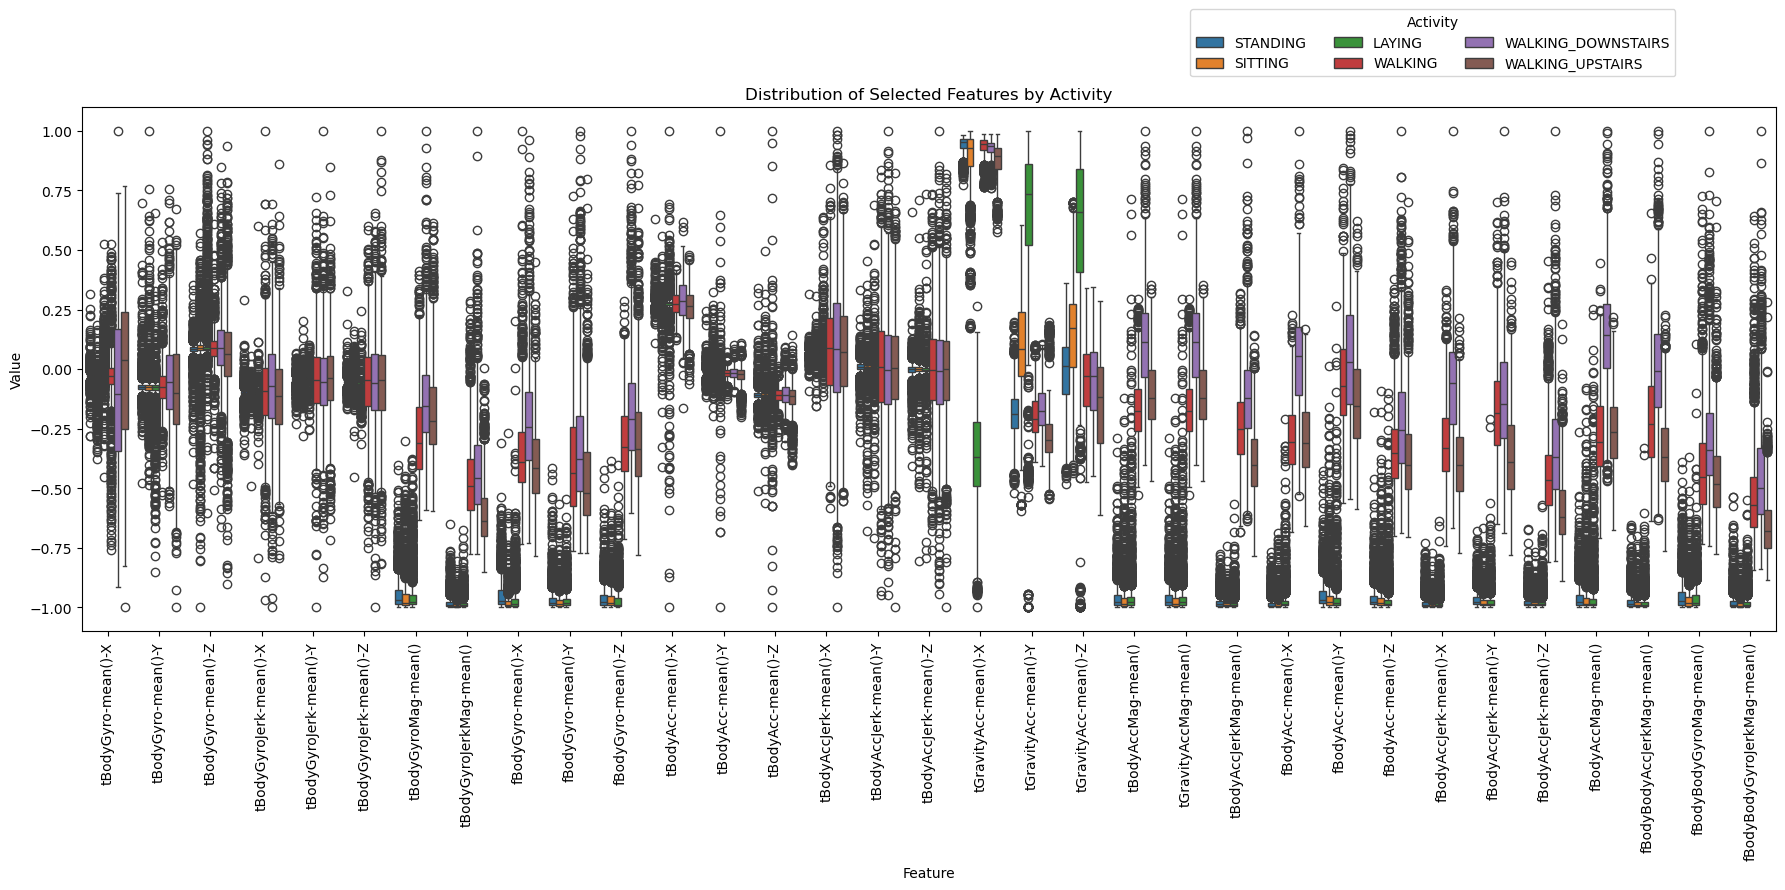

In [6]:
interesting_gyro_features = [
    'tBodyGyro-mean()-X',
    'tBodyGyro-mean()-Y',
    'tBodyGyro-mean()-Z',
    'tBodyGyroJerk-mean()-X',
    'tBodyGyroJerk-mean()-Y',
    'tBodyGyroJerk-mean()-Z',
    'tBodyGyroMag-mean()',
    'tBodyGyroJerkMag-mean()',
    'fBodyGyro-mean()-X',
    'fBodyGyro-mean()-Y',
    'fBodyGyro-mean()-Z'
]

interesting_accl_features = [
    'tBodyAcc-mean()-X',
    'tBodyAcc-mean()-Y',
    'tBodyAcc-mean()-Z',
    'tBodyAccJerk-mean()-X',
    'tBodyAccJerk-mean()-Y',
    'tBodyAccJerk-mean()-Z',
    'tGravityAcc-mean()-X',
    'tGravityAcc-mean()-Y',
    'tGravityAcc-mean()-Z',
    'tBodyAccMag-mean()',
    'tGravityAccMag-mean()',
    'tBodyAccJerkMag-mean()',
    'fBodyAcc-mean()-X',
    'fBodyAcc-mean()-Y',
    'fBodyAcc-mean()-Z',
    'fBodyAccJerk-mean()-X',
    'fBodyAccJerk-mean()-Y',
    'fBodyAccJerk-mean()-Z',
    'fBodyAccMag-mean()',
    'fBodyBodyAccJerkMag-mean()',
    'fBodyBodyGyroMag-mean()',
    'fBodyBodyGyroJerkMag-mean()'
]

# Combine gyroscope and accelerometer features
interesting_features = interesting_gyro_features + interesting_accl_features
# Add the Activity Name
interesting_features.append('ActivityName')

# Visualize multiple features across ActivityName by melting the data together
melted_df = full_df.melt(id_vars='ActivityName', value_vars=interesting_features, var_name='Feature', value_name='Value')

# Setup the plot
plt.figure(figsize=(18, 10))
sns.boxplot(data=melted_df, x='Feature', y='Value', hue='ActivityName')
# Define the graph details
# Rotate x-tick labels and align them
plt.xticks(rotation=90)  # Align right for better readability
plt.title('Distribution of Selected Features by Activity')
# Move legend above
plt.legend(title='Activity', bbox_to_anchor=(0.65, 1.20), loc='upper left', ncol=3)

# Save the graph as a PNG
plt.savefig(
    'distribution_features_activity.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Adjust layout to make room for legend and rotated ticks
plt.tight_layout(rect=[0, 0, 1, 0.95])  # reserve top 5% space for legend
plt.show()

# Count Plots
---

## Activities Count
---

This visualization shows the distribution of activities by the Activity Name. This gives us a better sense of how equal the distribution of tests was between the 30 participants.

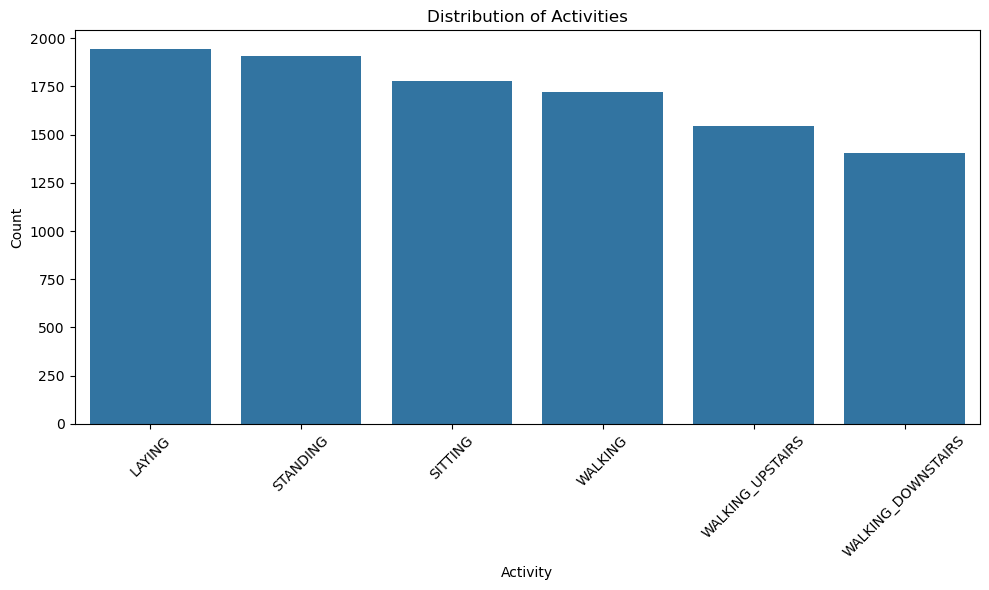

In [7]:
# Setup the plot
plt.figure(figsize=(10, 6))
sns.countplot(data=full_df, x='ActivityName', order=full_df['ActivityName'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Activities')
plt.xlabel('Activity')
plt.ylabel('Count')

# Save the graph as a PNG
plt.savefig(
    'activities_count_countplot.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

# Regression Plot

This will show the regression analysis between all the activities

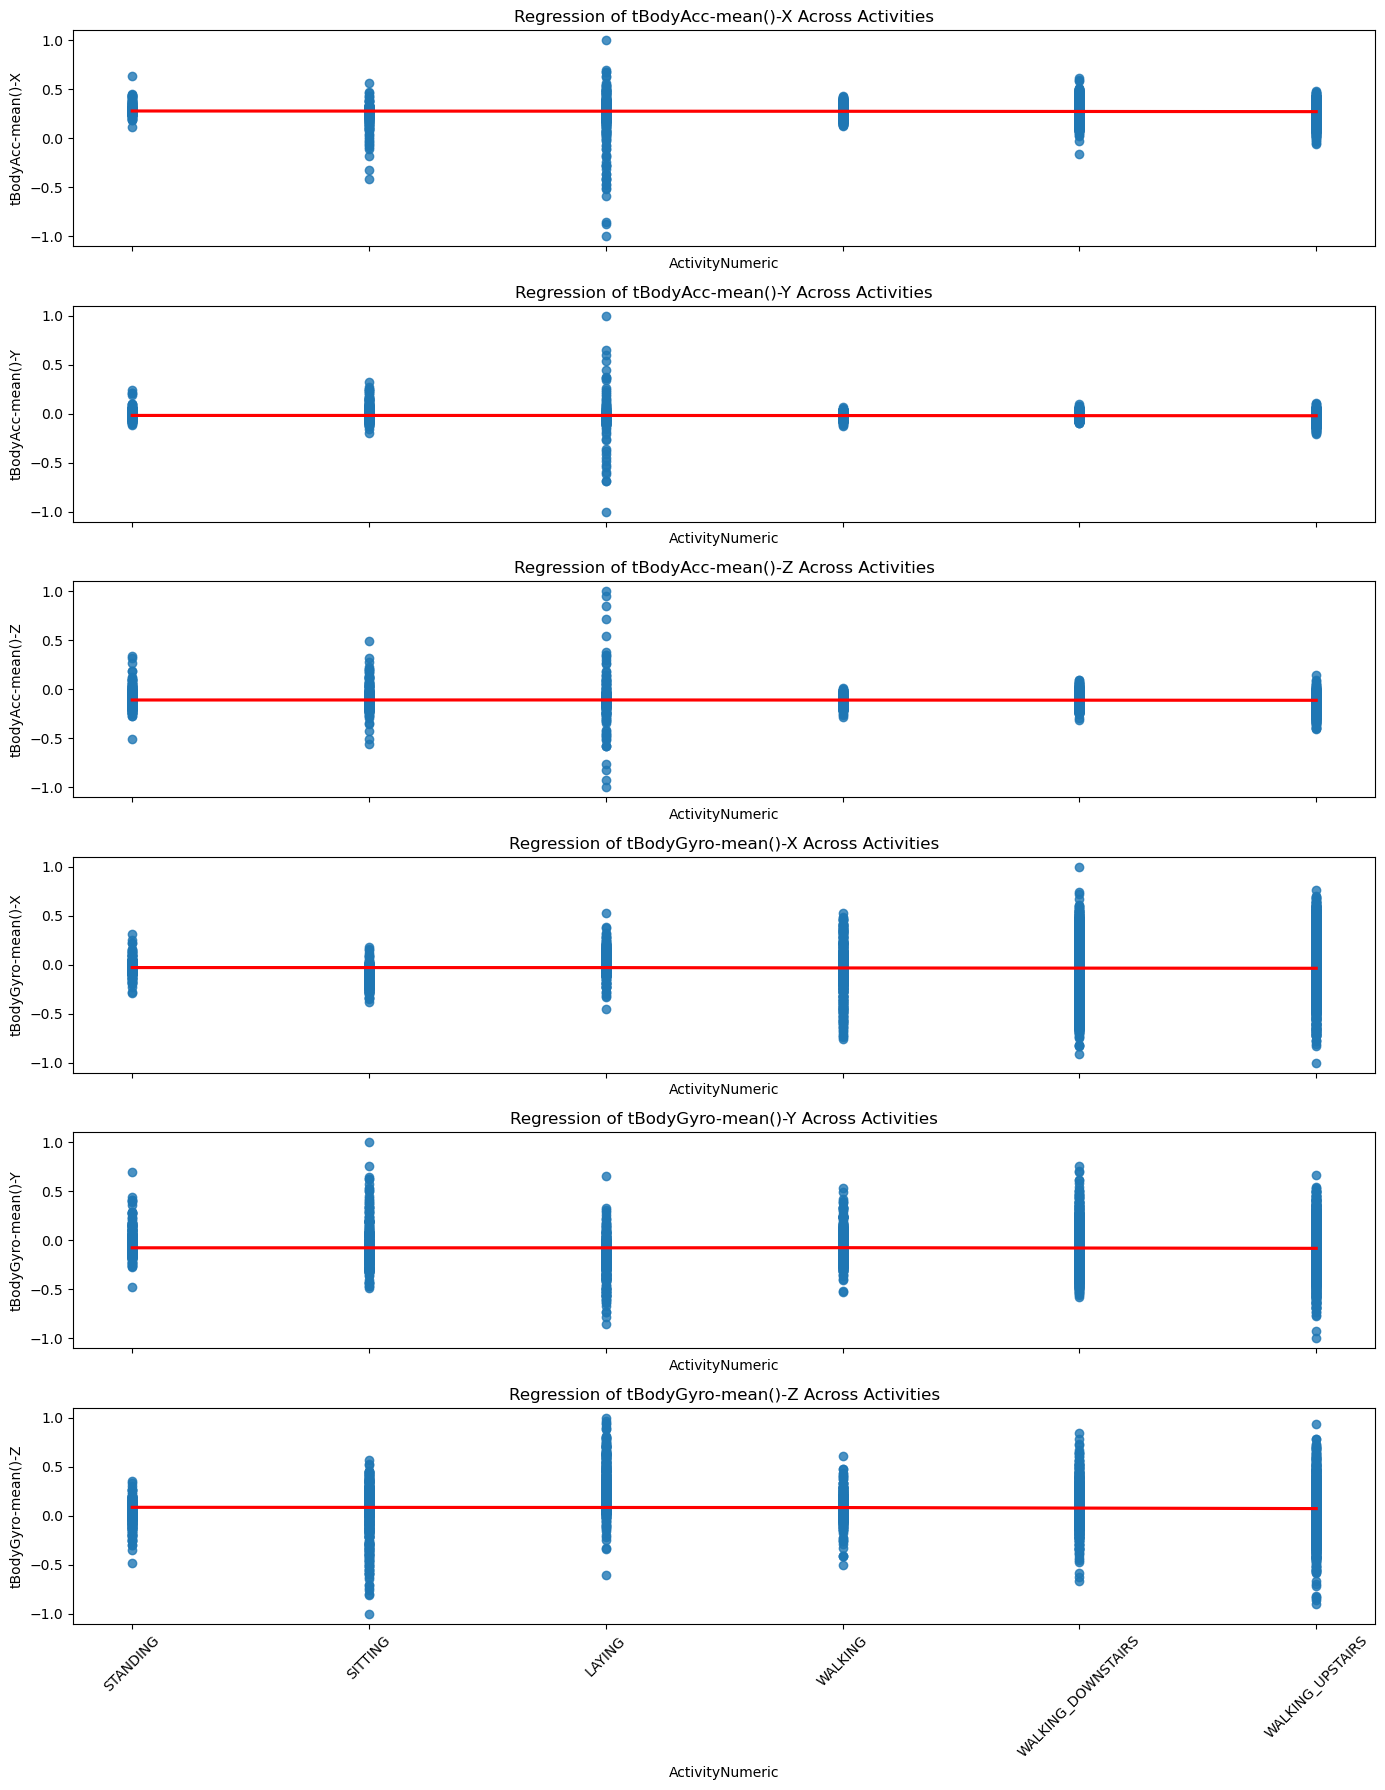

In [8]:
# Map activities to numeric values
activity_mapping = {name: idx for idx, name in enumerate(full_df['ActivityName'].unique())}
full_df['ActivityNumeric'] = full_df['ActivityName'].map(activity_mapping)

# Extract features
features = [
    'tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
    'tBodyGyro-mean()-X', 'tBodyGyro-mean()-Y', 'tBodyGyro-mean()-Z'
]

# Set up subplots
fig, axs = plt.subplots(len(features), 1, figsize=(14, 18), sharex=True)

# Iterate through each of the features we want to subplot
for i, feature in enumerate(features):
    sns.regplot(
        data=full_df,
        x='ActivityNumeric',  # Use numeric column for x-axis
        y=feature,
        lowess=True,
        scatter=True,
        ci=None,
        line_kws={"color": "red"},
        ax=axs[i]
    )
    axs[i].set_ylabel(feature)
    axs[i].set_title(f'Regression of {feature} Across Activities')
    axs[i].set_xticks(list(activity_mapping.values()))
    axs[i].set_xticklabels(list(activity_mapping.keys()), rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Save the plot as PNG
plt.savefig(
    'acc_gyro_regression_subplots.png',
    dpi=300,
    transparent=False,
    bbox_inches='tight'
)
# Show visualization
plt.show()

# Box Plots

The dataset gauges the density of Anxiety levels (GAD), Social Phobia levels (SPIN),
and Life Satisfaction levels (SWL). This helps to show the distribution of participants
among the three factors.

## Distribution of Body Acceleration (Mean)
---

This visualization shows the distribution of each axis from the data collected (x-axis, y-axis, and z-axis).

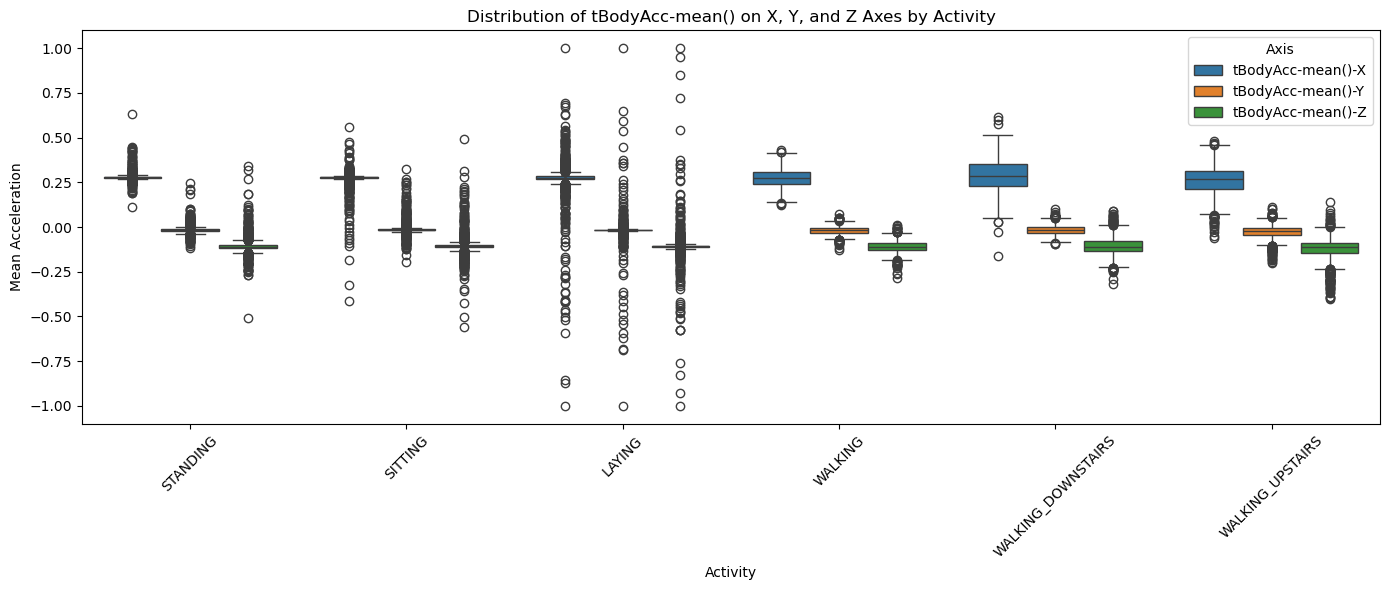

In [9]:
# Melt the DataFrame to long format
melted_df = full_df.melt(id_vars='ActivityName', 
                         value_vars=['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z'],
                         var_name='Axis', 
                         value_name='Value')

# Create the boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(data=melted_df, x='ActivityName', y='Value', hue='Axis')
# Setup the graph details
plt.xticks(rotation=45)
plt.title('Distribution of tBodyAcc-mean() on X, Y, and Z Axes by Activity')
plt.xlabel('Activity')
plt.ylabel('Mean Acceleration')
plt.legend(title='Axis', loc='upper right')

# Save the graph as a PNG
plt.savefig(
    'body-acceleration-mean-boxplot.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

## Distribution of Body Acceleration (Standard Deviation)
---

This visualization shows the distribution of each axis from the data collected (x-axis, y-axis, and z-axis).

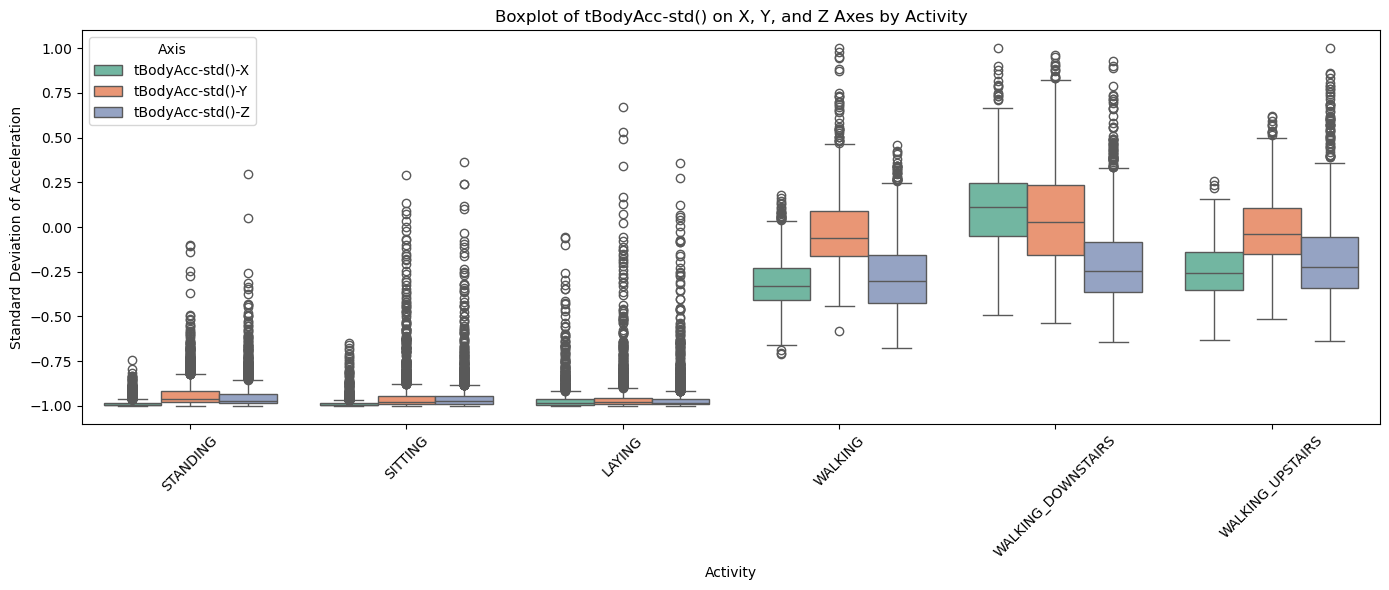

In [10]:
# Melt the DataFrame to long format for std features
melted_std_df = full_df.melt(
    id_vars='ActivityName',
    value_vars=['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z'],
    var_name='Axis',
    value_name='Value'
)

# Create the boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(data=melted_std_df, x='ActivityName', y='Value', hue='Axis', palette='Set2')
# Setup the graph details
plt.xticks(rotation=45)
plt.title('Boxplot of tBodyAcc-std() on X, Y, and Z Axes by Activity')
plt.xlabel('Activity')
plt.ylabel('Standard Deviation of Acceleration')
plt.legend(title='Axis', loc='upper left')

# Save the graph as a PNG
plt.savefig(
    'body-acceleration-std-boxplot.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

# Principal Component Analysis (PCA)
---

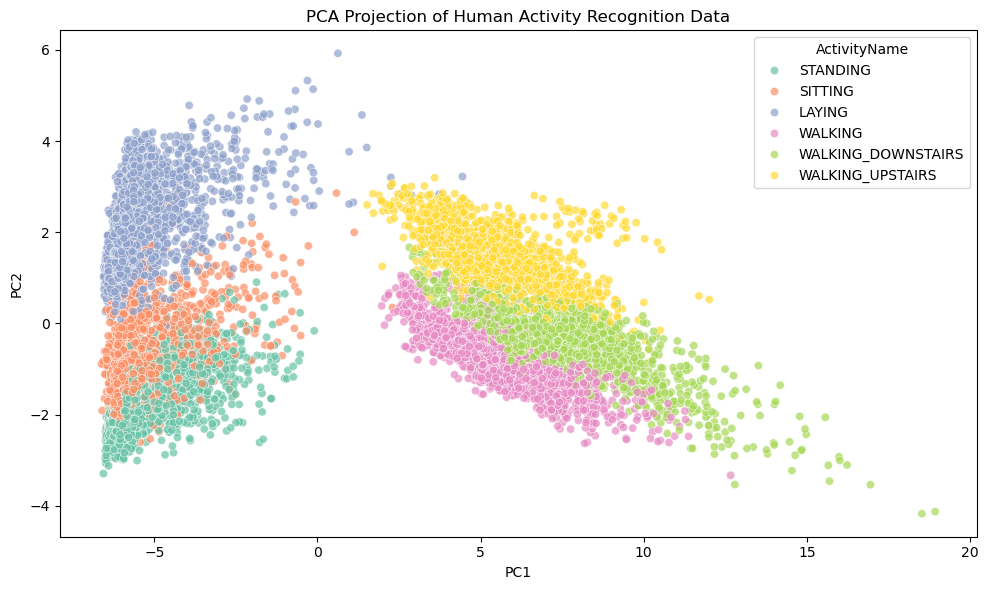

In [11]:
# Drop non-numeric columns
X = full_df.drop(columns=['Subject', 'Activity', 'ActivityName'])

# Drop duplicate ActivityName columns generated by Seaborn (if they exist)
if 'ActivityName_x' in X.columns or 'ActivityName_y' in X.columns:
    X = X.drop(columns=['ActivityName_x', 'ActivityName_y'])

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Create DataFrame with PCA result
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['ActivityName'] = full_df['ActivityName']  # Add activity label back for plotting

# Graph the reduced DataFrame
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='ActivityName', alpha=0.7, palette='Set2')
plt.title('PCA Projection of Human Activity Recognition Data')

# Save the graph as a PNG
plt.savefig(
    'pca-activities-scattplot.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

# Heatmaps
---

These heatmaps show the correlation between the mean and standard deviation of the data collected

## Body Acceleration Heatmap (Mean and Standard Deviation)

This visualization shows the mean and standard deviation of body acceleration as a heatmap.

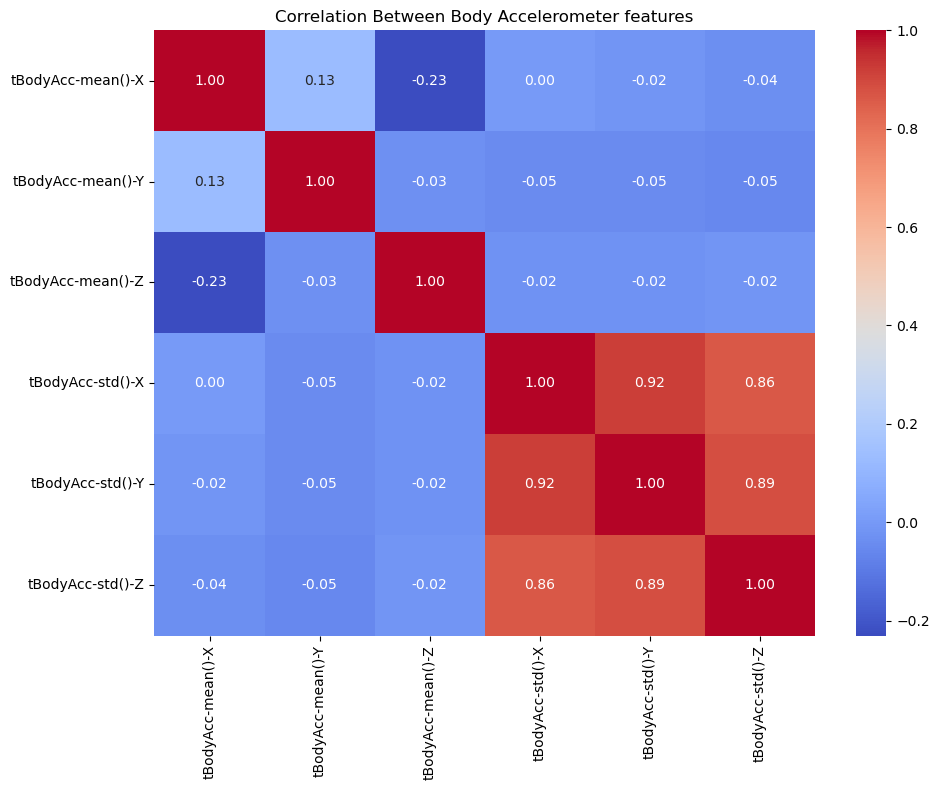

In [12]:
# The data subset for this heatmap
subset = full_df[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
                  'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z']]
# Setup the visualization
plt.figure(figsize=(10, 8))
sns.heatmap(subset.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Body Accelerometer features')

# Save the graph as a PNG
plt.savefig(
    'body-acceleration-heatmap.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

## Body Gyroscope Heatmap (Mean and Standard Deviation)

This visualization shows the mean and standard deviation of body rotation as a heat map.

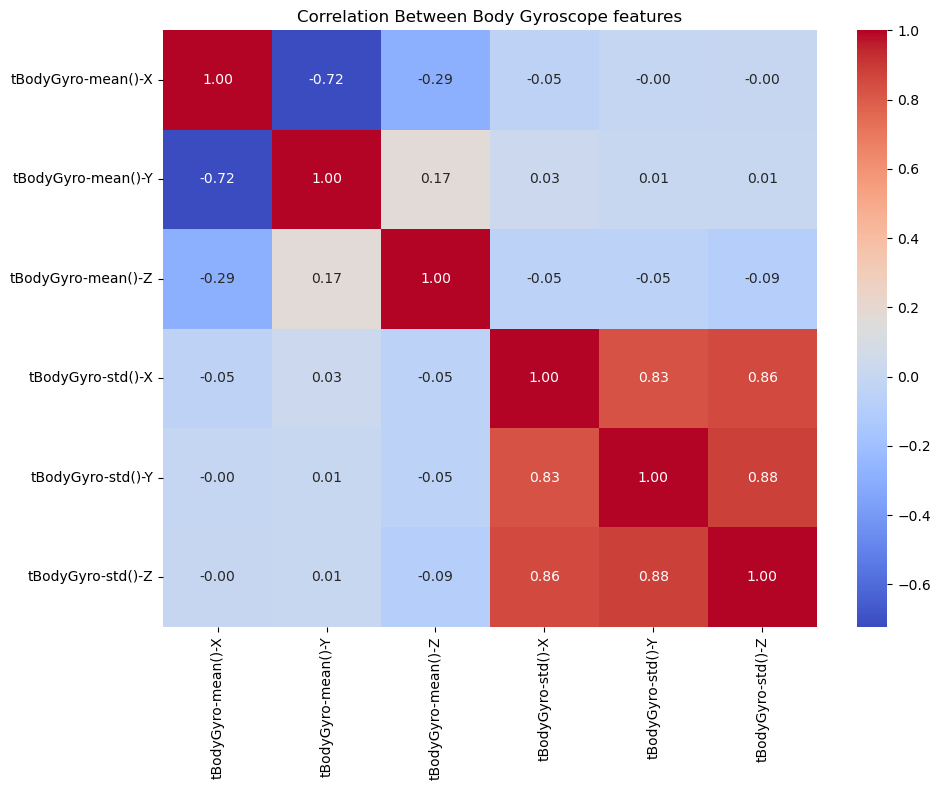

In [13]:
# The data subset for this heatmap
subset = full_df[['tBodyGyro-mean()-X', 'tBodyGyro-mean()-Y', 'tBodyGyro-mean()-Z',
                  'tBodyGyro-std()-X', 'tBodyGyro-std()-Y', 'tBodyGyro-std()-Z']]
# Setup the visualization
plt.figure(figsize=(10, 8))
sns.heatmap(subset.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Body Gyroscope features')

# Save the graph as a PNG
plt.savefig(
    'body-gyroscope-heatmap.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

# Pair Plots
---

These pair plots show the clustering and spatial relationships between the various activities and measurements

## Body Acceleration Pair Plot
---

This visualization shows the body acceleration metrics for each activity and reflects how they cluster

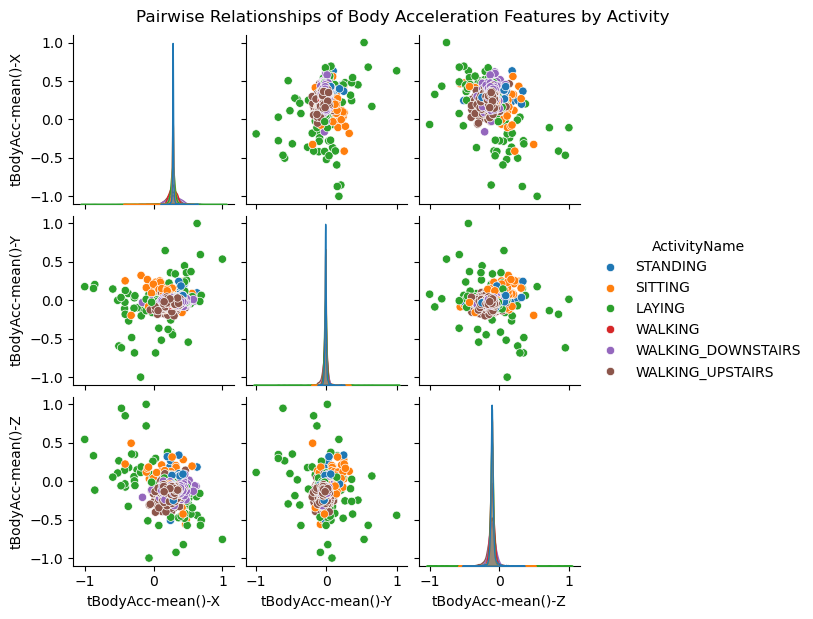

In [14]:
# Extract the body acceleration features
selected_features = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']
# Generate Pair plot
sns.pairplot(full_df[selected_features + ['ActivityName']], hue='ActivityName', height=2)
plt.suptitle('Pairwise Relationships of Body Acceleration Features by Activity', y=1.02)

# Save the graph as a PNG
plt.savefig(
    'body-acceleration-pairplot.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Show the visualization
plt.show()

## Body Rotation Pair Plot
---

This visualization shows the body rotation metrics for each activity and reflects how they cluster

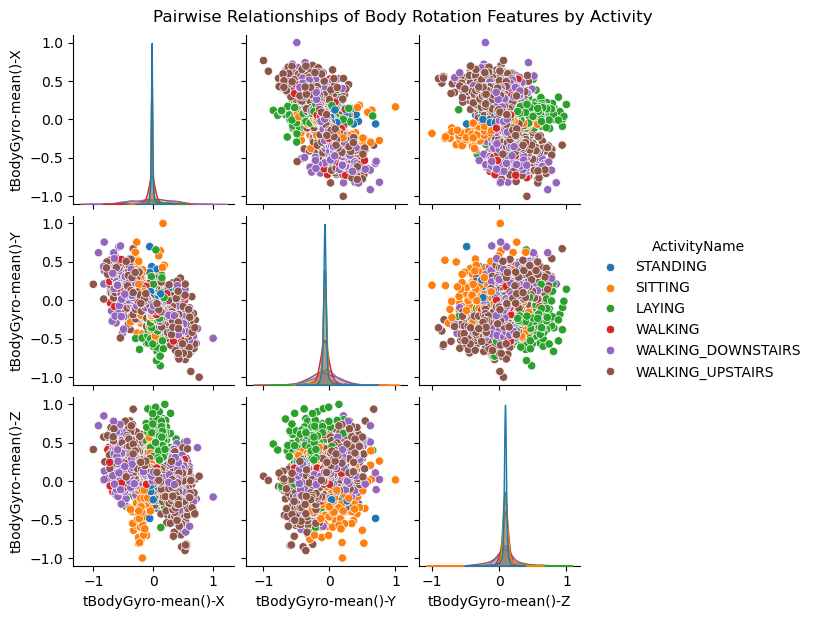

In [15]:
# Extract the body rotation features
selected_features = ['tBodyGyro-mean()-X', 'tBodyGyro-mean()-Y', 'tBodyGyro-mean()-Z']
# Generate Pair plot
sns.pairplot(full_df[selected_features + ['ActivityName']], hue='ActivityName', height=2)
plt.suptitle('Pairwise Relationships of Body Rotation Features by Activity', y=1.02)

# Save the graph as a PNG
plt.savefig(
    'body-gyro-pairplot.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Show the visualization
plt.show()

# Histogram Plots
---

These histograms show the frequency distributions per activity

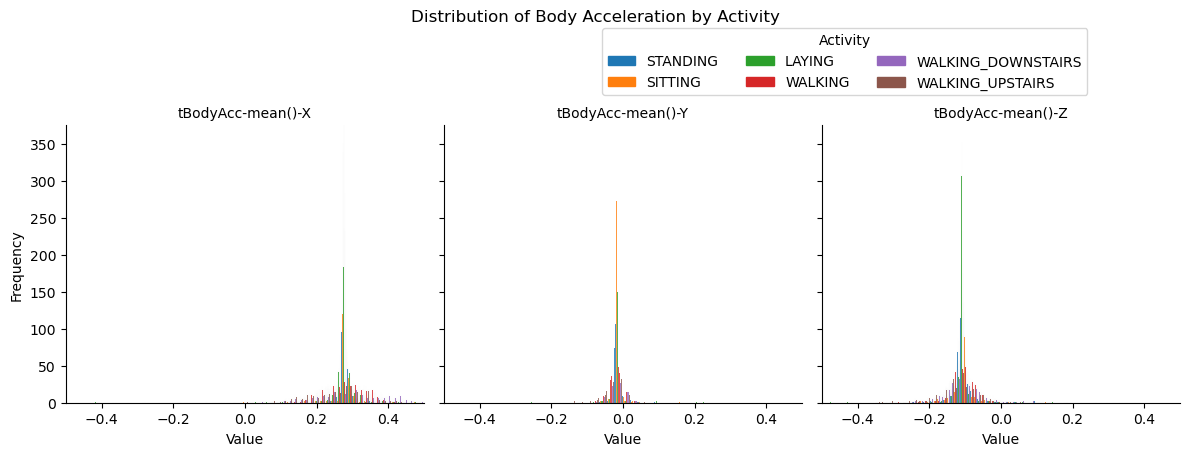

In [16]:
# Select features
selected_features = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']

# Define a consistent palette
palette = sns.color_palette("tab10", n_colors=full_df['ActivityName'].nunique())
activity_order = full_df['ActivityName'].unique()
color_map = dict(zip(activity_order, palette))

# Melt the DataFrame
melted_df = full_df.melt(
    id_vars='ActivityName',
    value_vars=selected_features,
    var_name='Feature',
    value_name='Value'
)

# Create FacetGrid
g = sns.FacetGrid(
    melted_df,
    col='Feature',
    col_wrap=3,
    height=4,
    sharex=True,
    sharey=True
)

# Plot using map_dataframe to allow hue and palette
g.map_dataframe(
    sns.histplot,
    x='Value',
    hue='ActivityName',
    multiple='dodge',
    element='bars',
    palette=color_map,
    alpha=0.8,
    legend=False  # Disable auto legend
)

# Manually create legend handles with correct colors
handles = [mpatches.Patch(color=color_map[activity], label=activity) for activity in activity_order]

# Add a custom legend to the figure
g.fig.legend(
    handles=handles,
    title='Activity',
    loc='upper left',
    bbox_to_anchor=(0.5, 1.10),
    ncol=3,
    frameon=True
)

# Final visualization settings
g.set_axis_labels('Value', 'Frequency')
g.set_titles('{col_name}')
g.set(xlim=(-0.5, 0.5), ylim=(0, 375))  # Customize based on data ranges
g.fig.suptitle('Distribution of Body Acceleration by Activity', y=1.13)

# Save the graph as a PNG
plt.savefig(
    'body-acceleration-facetgrid.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

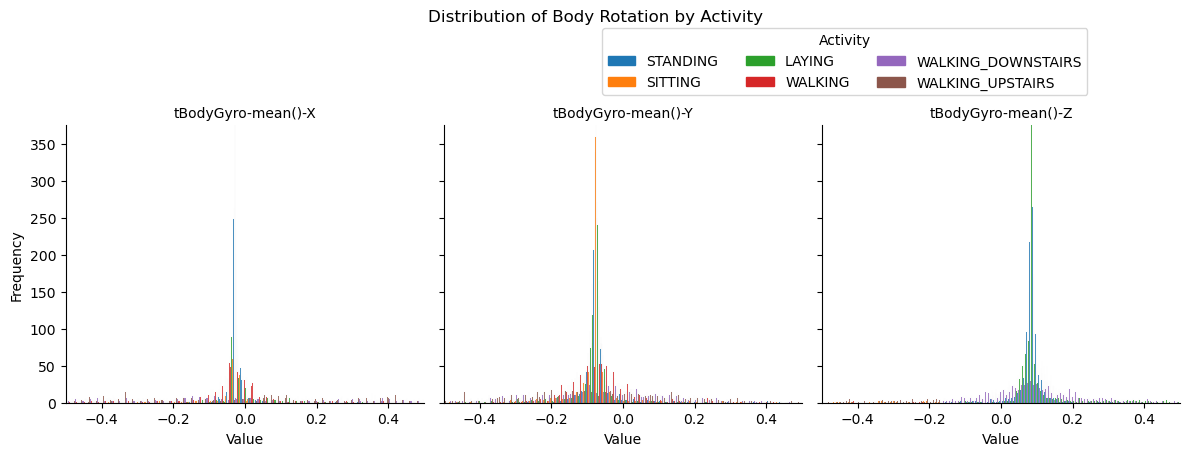

In [17]:
# Select features
selected_features = ['tBodyGyro-mean()-X', 'tBodyGyro-mean()-Y', 'tBodyGyro-mean()-Z']

# Define a consistent palette
palette = sns.color_palette("tab10", n_colors=full_df['ActivityName'].nunique())
activity_order = full_df['ActivityName'].unique()
color_map = dict(zip(activity_order, palette))

# Melt the DataFrame
melted_df = full_df.melt(
    id_vars='ActivityName',
    value_vars=selected_features,
    var_name='Feature',
    value_name='Value'
)

# Create FacetGrid
g = sns.FacetGrid(
    melted_df,
    col='Feature',
    col_wrap=3,
    height=4,
    sharex=True,
    sharey=True
)

# Plot using map_dataframe to allow hue and palette
g.map_dataframe(
    sns.histplot,
    x='Value',
    hue='ActivityName',
    multiple='dodge',
    element='bars',
    palette=color_map,
    alpha=0.8,
    legend=False  # Disable auto legend
)

# Manually create legend handles with correct colors
handles = [mpatches.Patch(color=color_map[activity], label=activity) for activity in activity_order]

# Add a custom legend to the figure
g.fig.legend(
    handles=handles,
    title='Activity',
    loc='upper left',
    bbox_to_anchor=(0.5, 1.10),
    ncol=3,
    frameon=True
)

# Final visualization settings
g.set_axis_labels('Value', 'Frequency')
g.set_titles('{col_name}')
g.set(xlim=(-0.5, 0.5), ylim=(0, 375))  # Customize based on data ranges
g.fig.suptitle('Distribution of Body Rotation by Activity', y=1.13)

# Save the graph as a PNG
plt.savefig(
    'body-gyro-facetgrid.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

# Violin Plot
---

## Body Acceleration density distribution

This violin plot shows the density of the body acceleration features

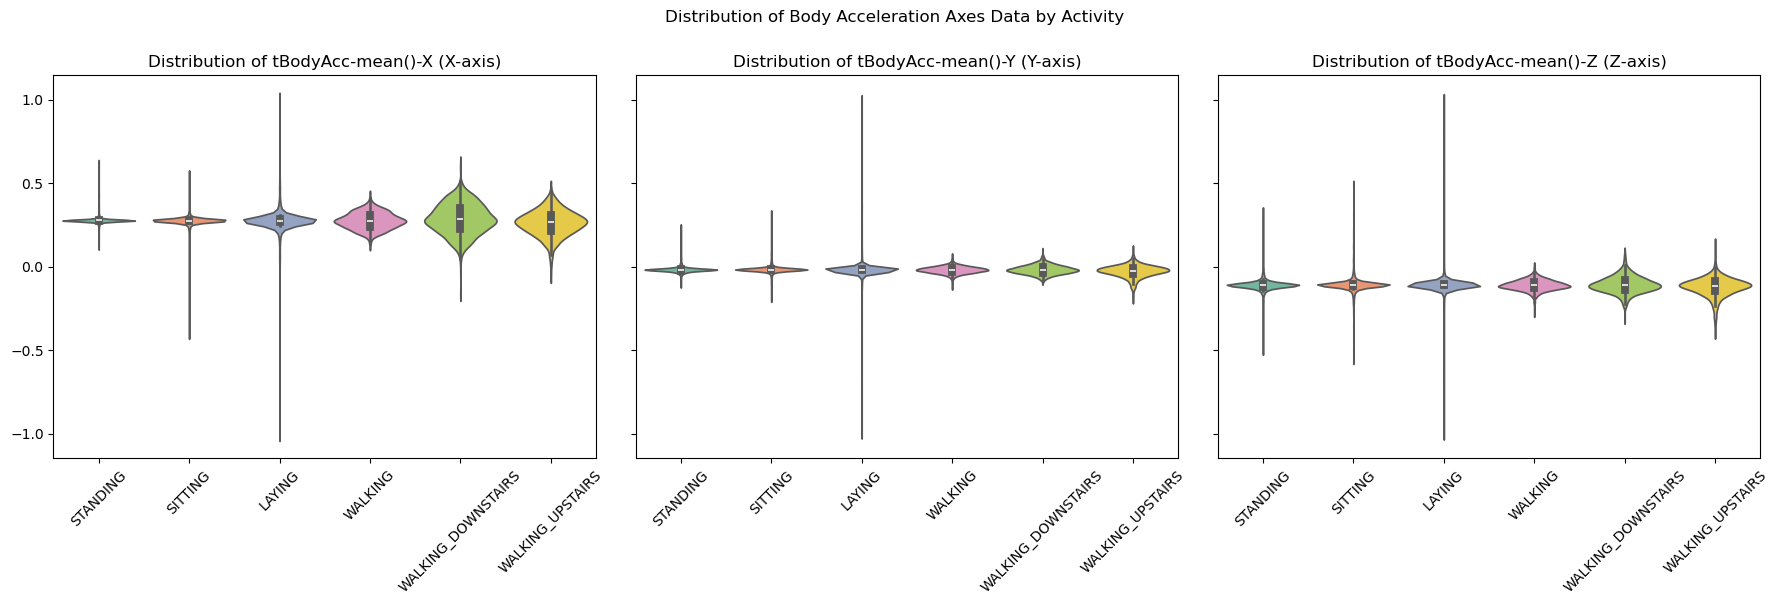

In [18]:
# Define the features to plot
features = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']
titles = ['X-axis', 'Y-axis', 'Z-axis']

# Create a figure with multiple subplots (3 for X, Y, and Z axes)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot each feature as a violin plot on its corresponding subplot
for i, (ax, feature, title) in enumerate(zip(axes, features, titles)):
    sns.violinplot(
        data=full_df,
        x='ActivityName',  # Use ActivityName to group the data by activity
        y=feature,         # Plot the feature
        hue='ActivityName', # Color by ActivityName
        palette='Set2',  # Use a pre-defined color palette
        ax=ax,  # Use the specific subplot axis
        dodge=False  # No separation of violins, just one for each ActivityName
    )
    ax.set_title(f'Distribution of {feature} ({title})')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', rotation=45)

# Adjust layout to prevent label cutoff and add a super title
plt.suptitle('Distribution of Body Acceleration Axes Data by Activity', y=1.0)

# Save the graph as a PNG
plt.savefig(
    'body-acceleration-violinplot.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Adjust layout to prevent label cutoff
plt.tight_layout()
# Show the plot
plt.show()

## Body Rotation density distribution

This violin plot shows the density of the body rotation features

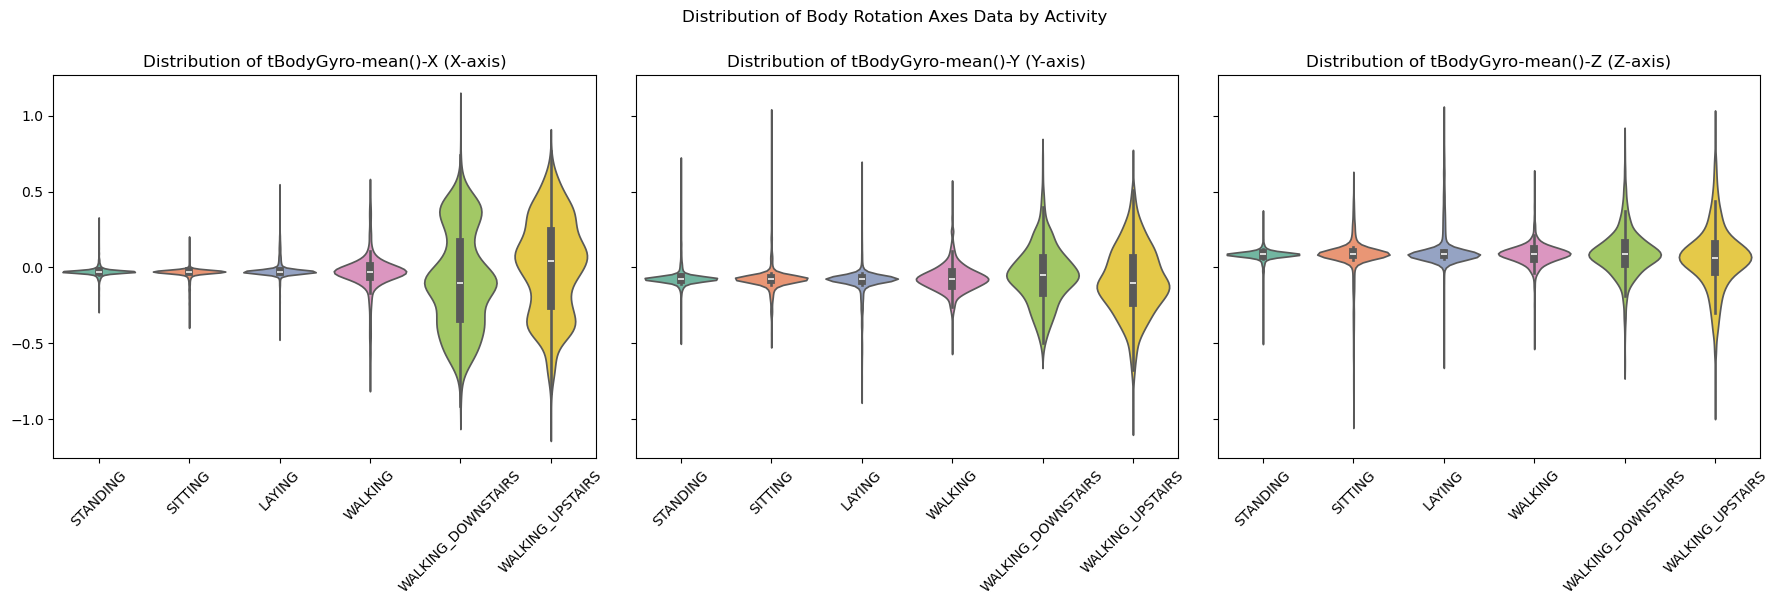

In [19]:
# Define the features to plot
features = ['tBodyGyro-mean()-X', 'tBodyGyro-mean()-Y', 'tBodyGyro-mean()-Z']
titles = ['X-axis', 'Y-axis', 'Z-axis']

# Create a figure with multiple subplots (3 for X, Y, and Z axes)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot each feature as a violin plot on its corresponding subplot
for i, (ax, feature, title) in enumerate(zip(axes, features, titles)):
    sns.violinplot(
        data=full_df,
        x='ActivityName',  # Use ActivityName to group the data by activity
        y=feature,         # Plot the feature
        hue='ActivityName', # Color by ActivityName
        palette='Set2',  # Use a pre-defined color palette
        ax=ax,  # Use the specific subplot axis
        dodge=False  # No separation of violins, just one for each ActivityName
    )
    ax.set_title(f'Distribution of {feature} ({title})')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', rotation=45)

# Adjust layout to prevent label cutoff and add a super title
plt.suptitle('Distribution of Body Rotation Axes Data by Activity', y=1.0)

# Save the graph as a PNG
plt.savefig(
    'body-rotation-violinplot.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Adjust layout to prevent label cutoff
plt.tight_layout()
# Show the plot
plt.show()

# Strip Plots
---

## Body Acceleration Strip Plot

This shows a scatter-like plot of the values distributed by activity

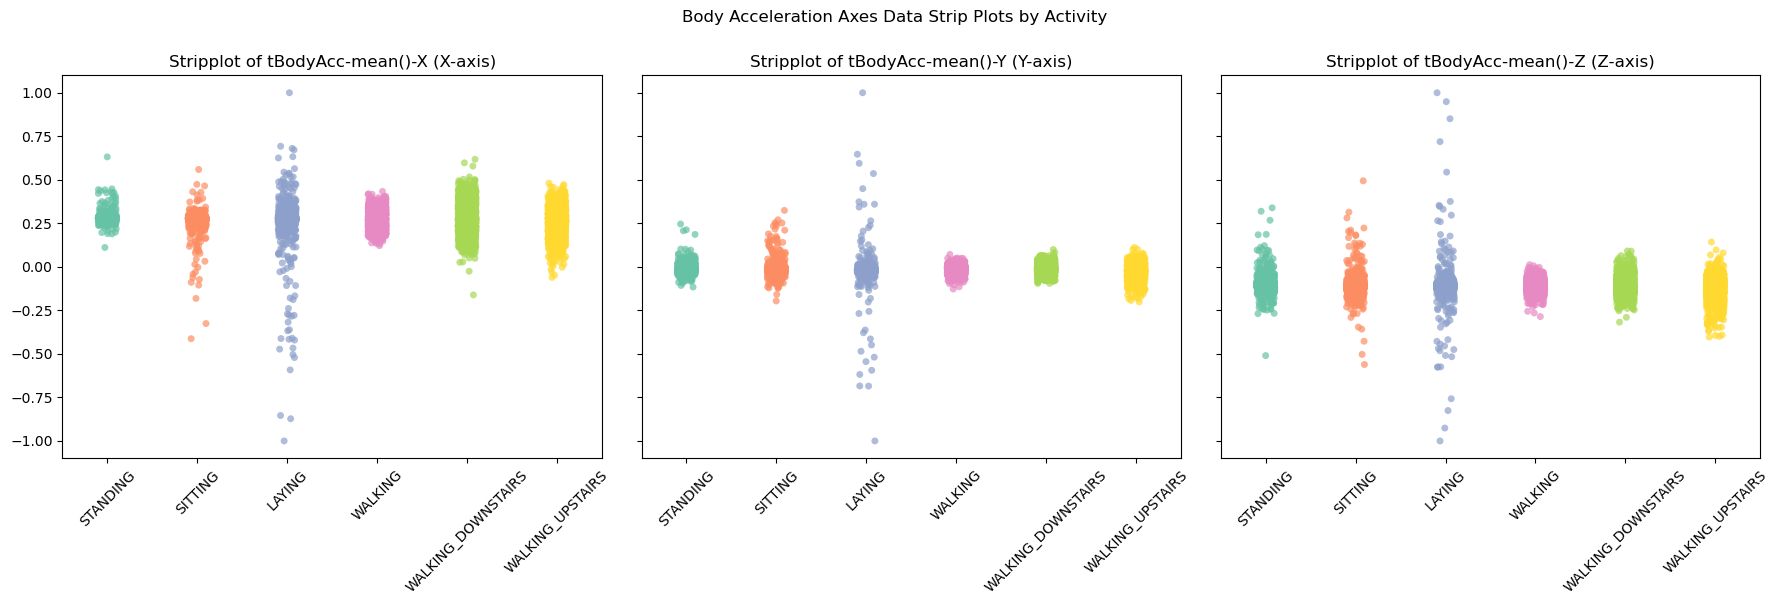

In [20]:
# Extract the features to plot
features = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']
titles = ['X-axis', 'Y-axis', 'Z-axis']

# Create a figure with multiple subplots (3 for X, Y, and Z axes)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot each feature as a strip plot on its corresponding subplot
for i, (ax, feature, title) in enumerate(zip(axes, features, titles)):
    sns.stripplot(
        data=full_df,
        x='ActivityName',  # Group the data by activity
        y=feature,         # Plot the feature
        jitter=True,       # Add jitter to make the points clearer
        hue='ActivityName', # Color by ActivityName
        palette='Set2',    # Use a pre-defined color palette
        ax=ax,  # Use the specific subplot axis
        dodge=False,  # No separation of points, just one for each ActivityName
        marker='o',    # Choose the marker style
        alpha=0.7,     # Set transparency to help see overlapping points
    )
    ax.set_title(f'Stripplot of {feature} ({title})')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', rotation=45)

# Adjust layout to prevent label cutoff and add a super title
plt.suptitle('Body Acceleration Axes Data Strip Plots by Activity', y=1.0)

# Save the graph as a PNG
plt.savefig(
    'body-acceleration-stripplot.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Adjust layout to prevent label cutoff
plt.tight_layout()
# Show the plot
plt.show()

## Body Rotation Strip Plot

This shows a scatter-like plot of the values distributed by activity

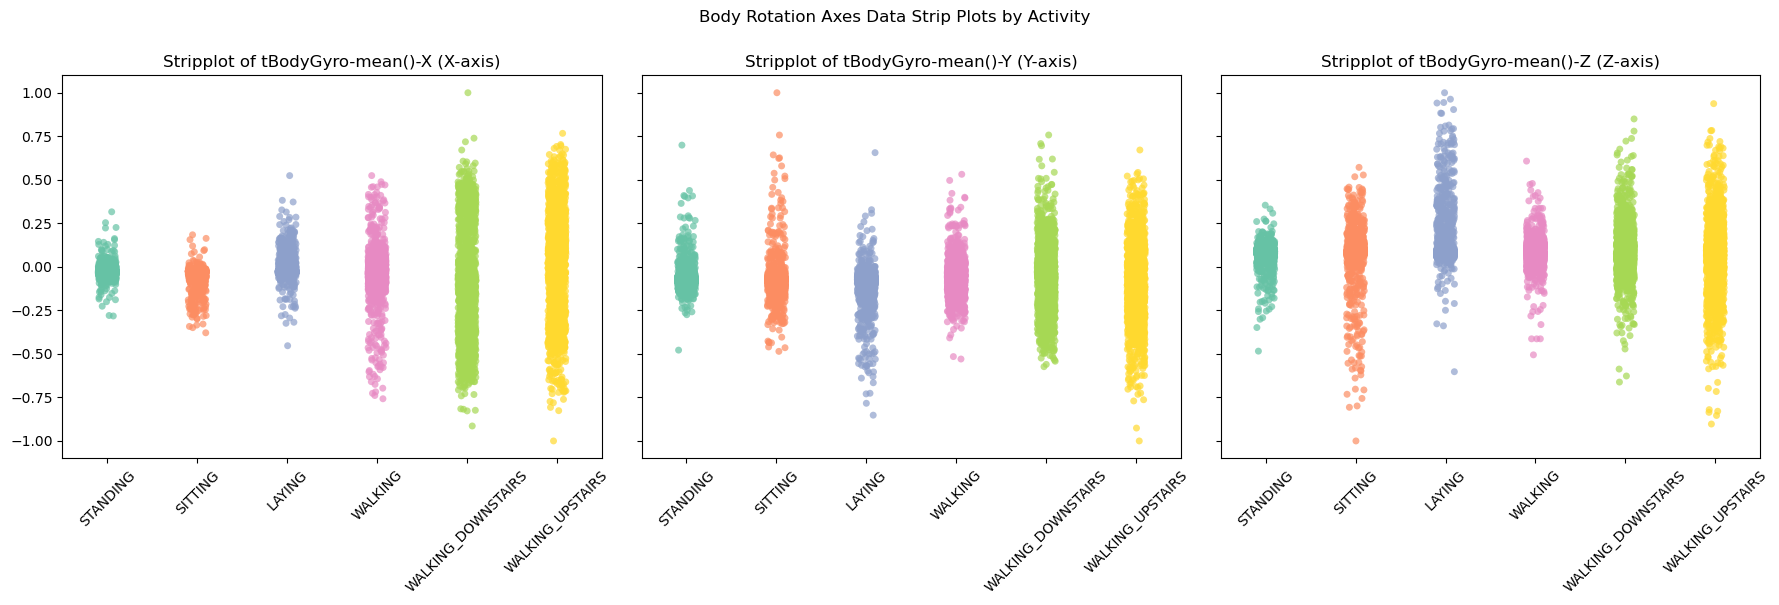

In [21]:
# Extract the features to plot
features = ['tBodyGyro-mean()-X', 'tBodyGyro-mean()-Y', 'tBodyGyro-mean()-Z']
titles = ['X-axis', 'Y-axis', 'Z-axis']

# Create a figure with multiple subplots (3 for X, Y, and Z axes)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot each feature as a strip plot on its corresponding subplot
for i, (ax, feature, title) in enumerate(zip(axes, features, titles)):
    sns.stripplot(
        data=full_df,
        x='ActivityName',  # Group the data by activity
        y=feature,         # Plot the feature
        jitter=True,       # Add jitter to make the points clearer
        hue='ActivityName', # Color by ActivityName
        palette='Set2',    # Use a pre-defined color palette
        ax=ax,  # Use the specific subplot axis
        dodge=False,  # No separation of points, just one for each ActivityName
        marker='o',    # Choose the marker style
        alpha=0.7,     # Set transparency to help see overlapping points
    )
    ax.set_title(f'Stripplot of {feature} ({title})')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', rotation=45)

# Adjust layout to prevent label cutoff and add a super title
plt.suptitle('Body Rotation Axes Data Strip Plots by Activity', y=1.0)

# Save the graph as a PNG
plt.savefig(
    'body-rotation-stripplot.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Adjust layout to prevent label cutoff
plt.tight_layout()
# Show the plot
plt.show()

# Joint Plots
---

## Body Acceleration Joint Plot

This shows a scatter-like plot of the values distributed by activity, as well as a linear distribution

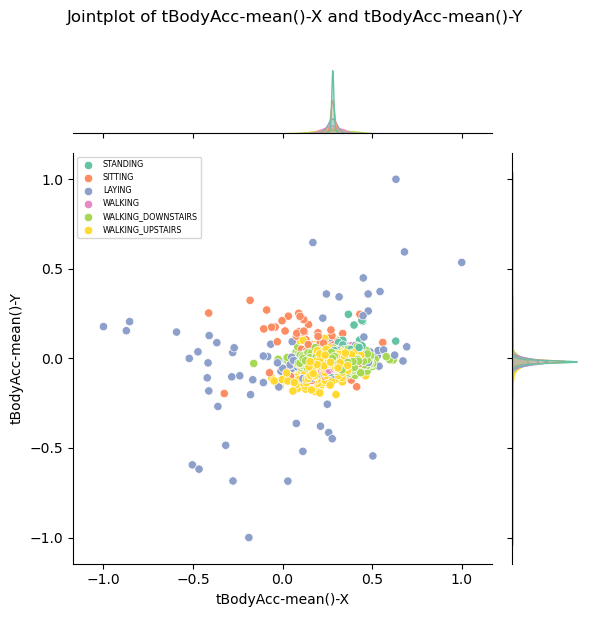

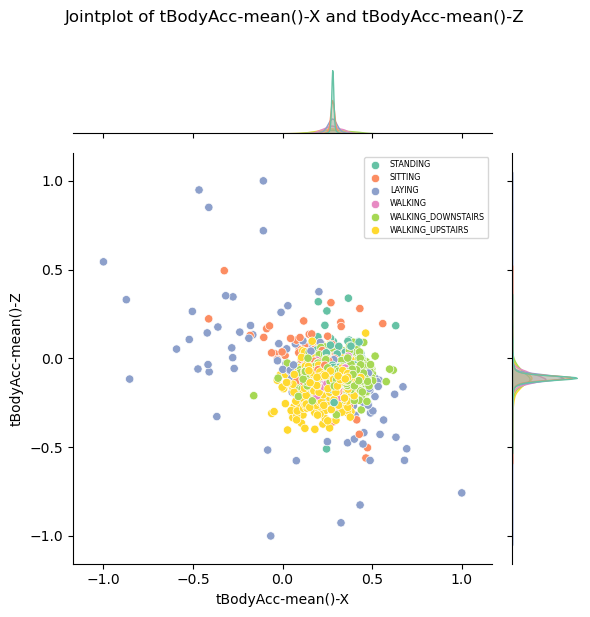

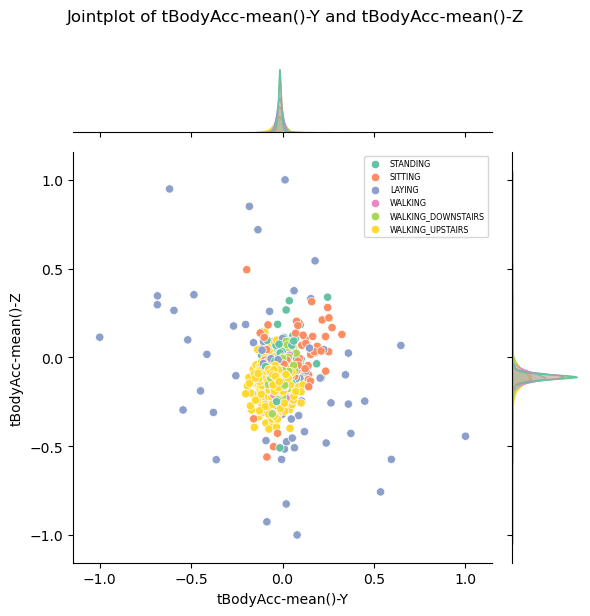

In [22]:
# Create the first jointplot for (X, Y)
g1 = sns.jointplot(
    data=full_df,
    x='tBodyAcc-mean()-X', 
    y='tBodyAcc-mean()-Y',
    hue='ActivityName',
    kind='scatter',
    palette='Set2'
)
g1.fig.suptitle('Jointplot of tBodyAcc-mean()-X and tBodyAcc-mean()-Y', y=1.02)
g1.fig.tight_layout()
g1.ax_joint.legend(fontsize='xx-small') # Shrink the legend size
# Save the graph as a PNG
g1.fig.savefig(
    'body-acceleration-jointplot-1.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)

# Create the second jointplot for (X, Z)
g2 = sns.jointplot(
    data=full_df,
    x='tBodyAcc-mean()-X',
    y='tBodyAcc-mean()-Z',
    hue='ActivityName',
    kind='scatter',
    palette='Set2'
)
g2.fig.suptitle('Jointplot of tBodyAcc-mean()-X and tBodyAcc-mean()-Z', y=1.02)
g2.fig.tight_layout()
g2.ax_joint.legend(fontsize='xx-small') # Shrink the legend size
# Save the graph as a PNG
g2.fig.savefig(
    'body-acceleration-jointplot-2.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)

# Create the third jointplot for (Y, Z)
g3 = sns.jointplot(
    data=full_df,
    x='tBodyAcc-mean()-Y',
    y='tBodyAcc-mean()-Z',
    hue='ActivityName',
    kind='scatter',
    palette='Set2'
)
g3.fig.suptitle('Jointplot of tBodyAcc-mean()-Y and tBodyAcc-mean()-Z', y=1.02)
g3.fig.tight_layout()
g3.ax_joint.legend(fontsize='xx-small') # Shrink the legend size
# Save the graph as a PNG
g3.fig.savefig(
    'body-acceleration-jointplot-3.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Adjust layout to prevent label cutoff
plt.tight_layout()
# Display the plots
plt.show()

## Body Rotation Joint Plot

This shows a scatter-like plot of the values distributed by activity, as well as a linear distribution

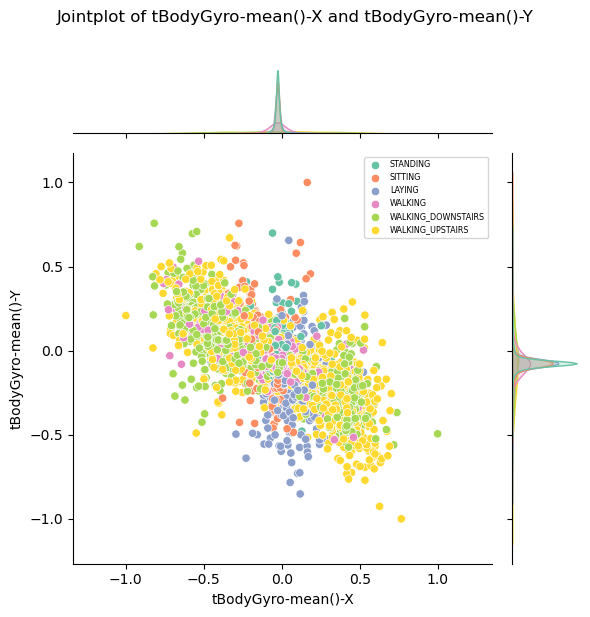

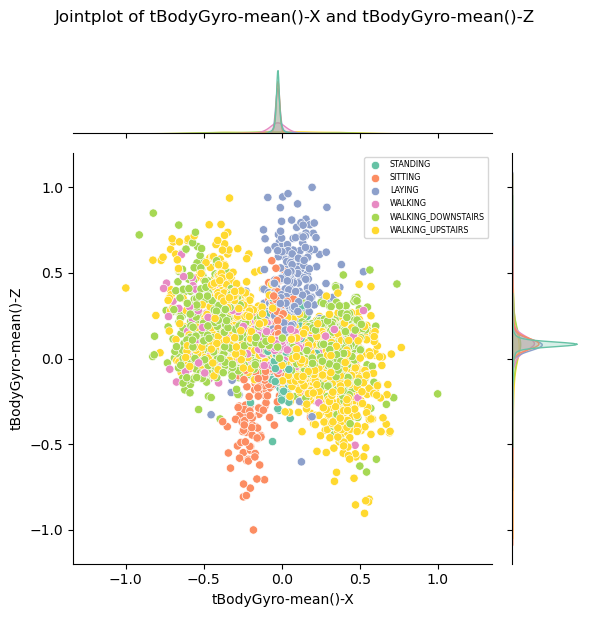

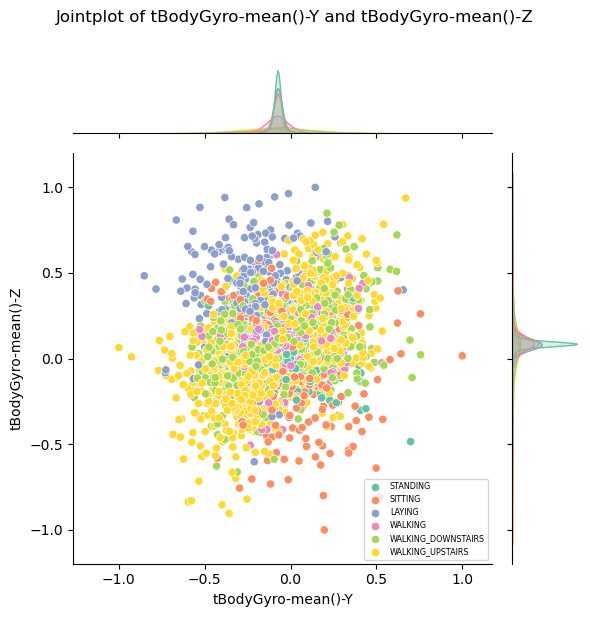

In [23]:
# Create the first jointplot for (X, Y)
g1 = sns.jointplot(
    data=full_df,
    x='tBodyGyro-mean()-X', 
    y='tBodyGyro-mean()-Y',
    hue='ActivityName',
    kind='scatter',
    palette='Set2'
)
g1.fig.suptitle('Jointplot of tBodyGyro-mean()-X and tBodyGyro-mean()-Y', y=1.02)
g1.fig.tight_layout()
g1.ax_joint.legend(fontsize='xx-small') # Shrink the legend size
# Save the graph as a PNG
g1.fig.savefig(
    'body-rotation-jointplot-1.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)

# Create the second jointplot for (X, Z)
g2 = sns.jointplot(
    data=full_df,
    x='tBodyGyro-mean()-X',
    y='tBodyGyro-mean()-Z',
    hue='ActivityName',
    kind='scatter',
    palette='Set2'
)
g2.fig.suptitle('Jointplot of tBodyGyro-mean()-X and tBodyGyro-mean()-Z', y=1.02)
g2.fig.tight_layout()
g2.ax_joint.legend(fontsize='xx-small') # Shrink the legend size
# Save the graph as a PNG
g2.fig.savefig(
    'body-rotation-jointplot-2.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)

# Create the third jointplot for (Y, Z)
g3 = sns.jointplot(
    data=full_df,
    x='tBodyGyro-mean()-Y',
    y='tBodyGyro-mean()-Z',
    hue='ActivityName',
    kind='scatter',
    palette='Set2'
)
g3.fig.suptitle('Jointplot of tBodyGyro-mean()-Y and tBodyGyro-mean()-Z', y=1.02)
g3.fig.tight_layout()
g3.ax_joint.legend(fontsize='xx-small') # Shrink the legend size
# Save the graph as a PNG
g3.fig.savefig(
    'body-rotation-jointplot-3.png',
    dpi=300,               # High resolution
    transparent=False,     # Transparent background
    bbox_inches='tight'   # Remove extra whitespace
)
# Adjust layout to prevent label cutoff
plt.tight_layout()
# Display the plots
plt.show()